In [2]:
#importing necessary details
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
#read csv file and convert into dataframe
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#To get the info of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


. No need to keep column unnamed: 0 . so, we can remove this .

In [8]:
#Droping the unnecessary column
data=data.drop(['Unnamed: 0'],axis=1)

In [9]:
#To Understood the dataset.
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


.There are no null values.                       
.there are little problem in mean and std( gap is less) in the column like radio,newspaper.                       
.There are may be some outliers present in the column like newspaper.                    

In [10]:
#To check the null gvalue details of all the column
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Anaconda\lib\site

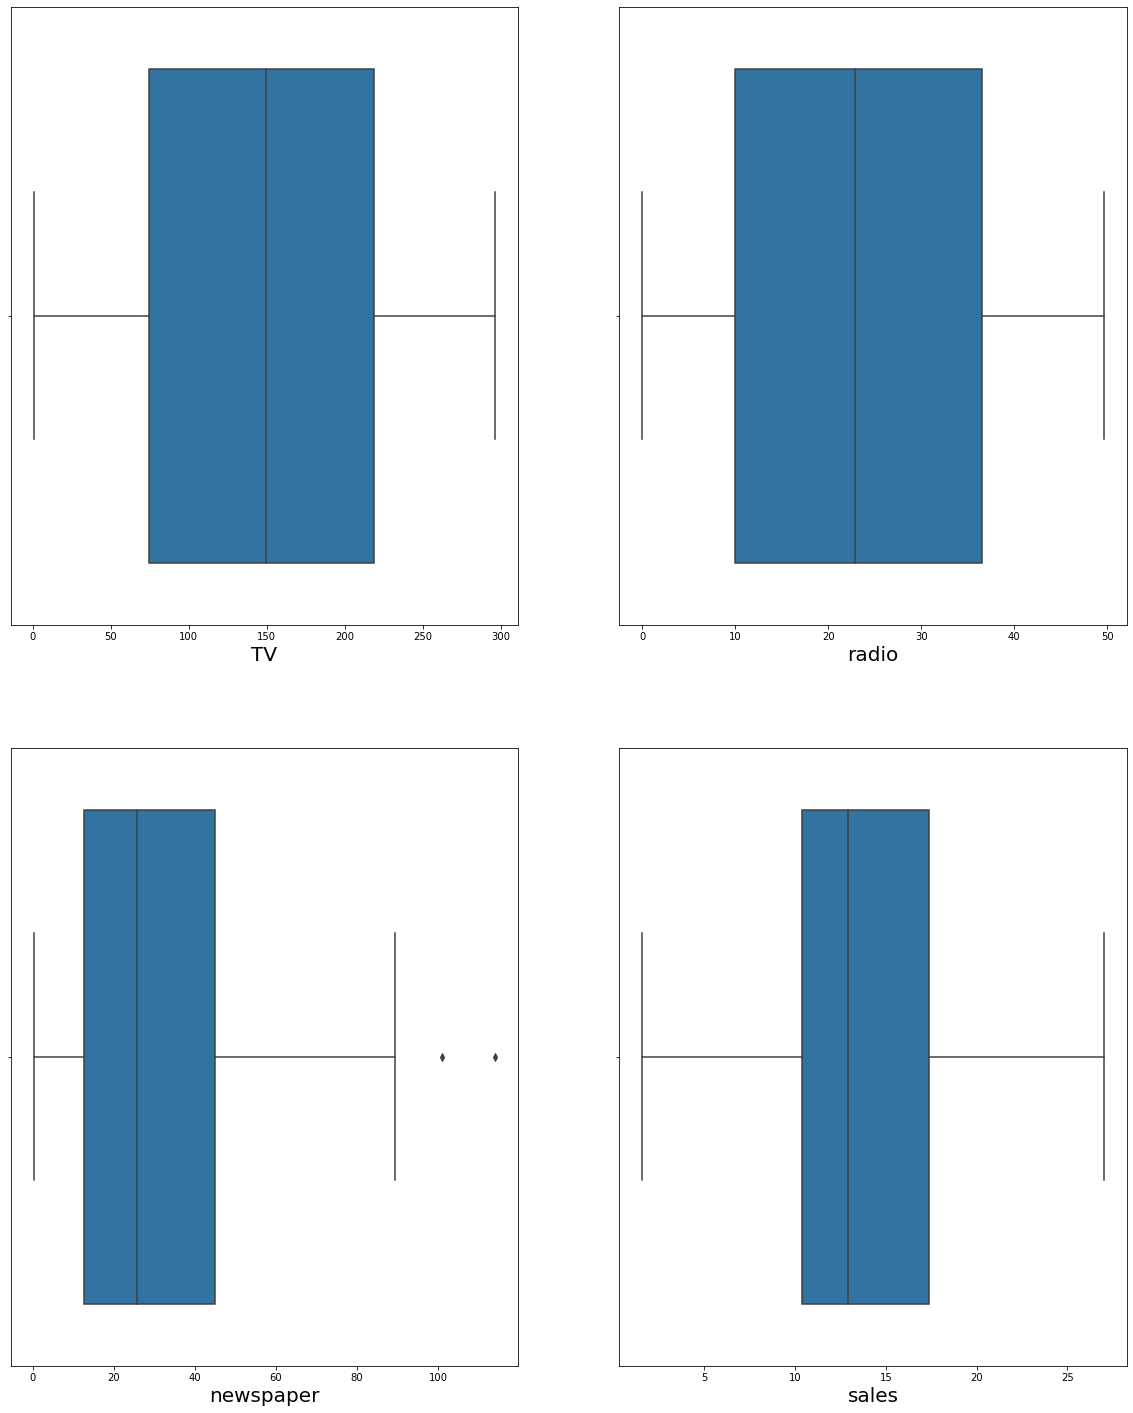

In [12]:
#let's see how data is distributed for every column(checking outliers using box plot)
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

.As we saw that little outliers is present only in newspaper , other column is ok. 

In [13]:
#finding IQR(inter Quantile range) to identify outliers
#1st Quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

#IQR
iqr=q3-q1

In [14]:
#removing outliers in newspaper
index=np.where(df['newspaper']>(q3.newspaper+(1.5*iqr.newspaper)))
data=data.drop(data.index[index])
data.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Anaconda\lib\site

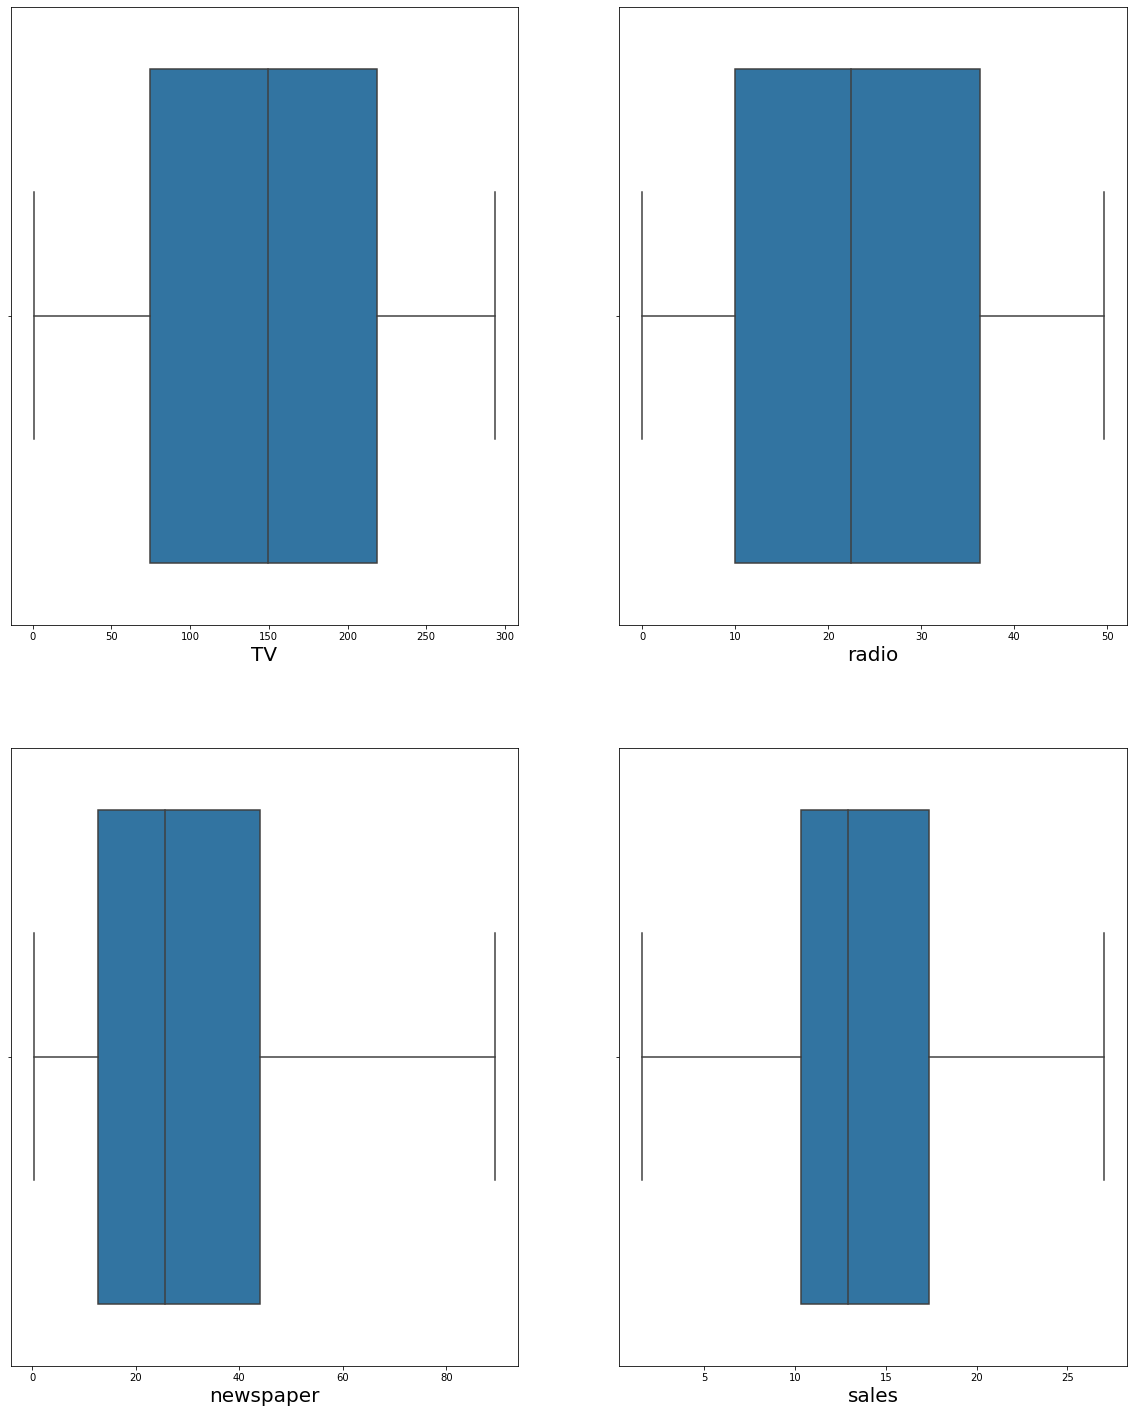

In [15]:
#To again check the outliers
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

.Now  the outliers are removed .so,we can proceed further

In [16]:
#Divide the dataset into features and label
x=data.drop(columns=['sales'])
y=data['sales']

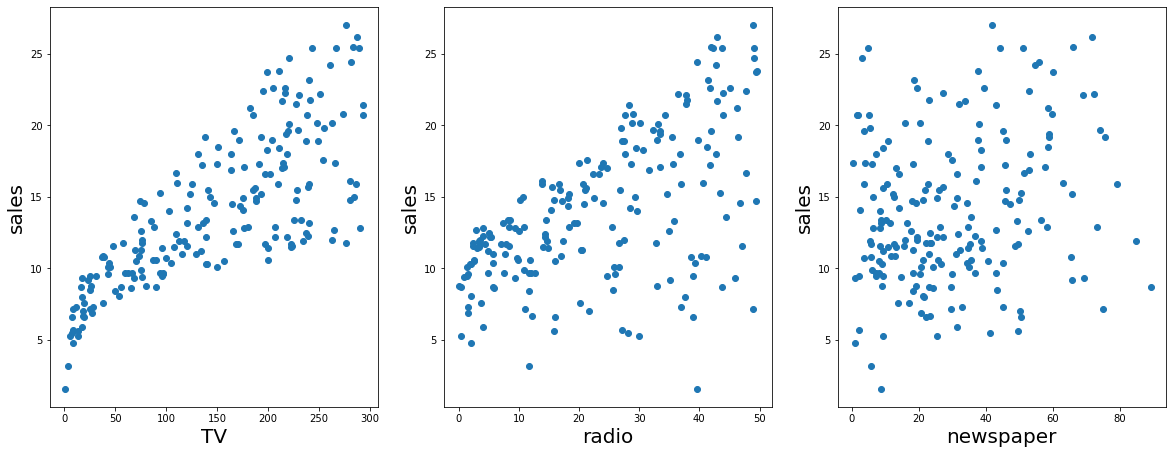

In [18]:
#visualizing Relationship
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.show()   

Great ,the relationship between the dependent and independent variables look fairly linear.(only newspaper have some distinct relationship but it is also approx linear).                            

In [19]:
#Data scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
#spliting our data in train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)

In [21]:
#model instantiating & training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#visualize the dataset
y_pred=regression.predict(x_test)
y_pred

array([11.33104845, 17.67008827, 24.53085486, 11.49290624, 15.36699795,
       16.36108964, 23.46853108, 15.07517358, 13.5280324 , 19.19380028,
       10.33774621, 16.18792192, 11.65000103, 20.95292901,  7.779677  ,
       14.9883946 , 16.5951315 , 10.18436184, 14.28614316,  8.78138997,
       16.80614682, 10.00917534, 17.31503638,  6.18743069, 17.95732   ,
       18.12359458, 15.58067671, 15.23997073, 17.11666354, 17.06238455,
       15.48843644, 18.40181983, 17.05749844, 14.89277004, 19.39578107,
        8.49302252, 12.12070668, 10.09363408, 10.1614874 , 12.19877686,
       20.59671731, 12.16966559, 15.11848205, 20.24065569, 20.52064562,
       21.03918138,  9.79726712, 11.20641629, 22.14651406,  8.24439426])

In [24]:
#In orderf to evaluate the model that how much the given data fit the model using Adjusted R2 score
regression.score(x_train,y_train)

0.8923645690485525

.So the model fit 89 % with the given train data.                

In [25]:
#let's check how well model fits the test data
regression.score(x_test,y_test)

0.8941020975027003

Test  data also fit 89% with the model.            

In [26]:
#To check wheather the model is overfitted or not
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [27]:
#Lasso Regularization
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [28]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.009042892950297542

In [29]:
#now using best parameter .let,s use lasso regression and see how well our data has fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.009042892950297542)

In [30]:
lasso_reg.score(x_test,y_test)

0.8940253610299451

Usingt LassoCV regularization we also got 89% fit.              

In [31]:
#Using RIdge regression model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [32]:
#best parameter
ridgecv.alpha_

0.002

In [33]:
#Using best parameter in ridge regression
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.002)

In [35]:
#To check the score
ridge_model.score(x_test,y_test)

0.8941010231257555

We got around same r2 score using Ridge regression as well.so, it's safe to say there is no overfitting.

In [36]:
#saving the model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [37]:
#predicted using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[230.1,37.8,69.2]]))
a

array([20.24065569])